## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [17]:
import pandas as pd

# Loading dataset
ecommerce = pd.read_csv('cleaned_ecommerce_dataset.csv')

# Printing total length
print(f"Total length of the dataset:", len(ecommerce))


Total length of the dataset: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [18]:
# Using head() to display first 5 rows
ecommerce.head()


userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4  
1  Restaurants & Gourmet       74      108.30          4  
2  Restaurants & Gourmet       84       69.00          4  
3                 Movies       68      143.11          4  
4                 Movies        6      117.89          4

In [19]:
# Displaying the dataset information
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Creating a copy of the dataset in which we will make modifications
ecommerce_encoded = ecommerce.copy()

# Creating an ordinal encoder instance
encoder = OrdinalEncoder()

# Selecting categorical columns for encoding
categorical_columns = ['gender', 'category', 'review']

# Fit and transform the data
ecommerce_encoded[categorical_columns] = encoder.fit_transform(ecommerce[categorical_columns])

# Calculating the correlations of these features with rating
correlations = ecommerce_encoded[['rating', 'helpfulness', 'gender', 'category', 'review']].corr()

correlations['rating']


rating         1.000000
helpfulness   -0.007523
gender        -0.034337
category      -0.163158
review        -0.036118
Name: rating, dtype: float64

### Necessary Explanations/Analysis on the Correlations:

**Most Correlated Feature**: category
- The `category` feature, with a correlation coefficient of -0.163158, is the most negatively correlated with `rating`. This means that an items category significantly impacts its rating; however, the negative sign indicates that as the numerical representation of categories increases , the ratings tend to decrease. This could suggest that certain categories are predisposed to lower rating.

**Least Correlated Feature**: helpfulness 
- The `helpfulness` feature, with a correlation coefficient of -0.007523, is the least correlated with `rating`. As the correlation is nearly zero, we can assume that helpfulness of a review has minimal direct linear relationship with the rating given to items.Meaning helpfulness doesn't significantly affect rating of the reviewed product.  

**Analysis of Other Features**:
- The `gender` and `review` features have similar negative correlations with `rating`, -0.034337 and -0.036118 respectively. These are stronger than the correlation with `helpfulness` but still relatively weak, suggesting only a slight association with ratings. 


### Discussion on the Impact of Correlation:

**Impact on Prediction Results**:
- **Strong Correlations**: Features with stronger (either positive or negative) correlations to the target variable are generally more informative for prediction models. The `category` feature, being the most correlated (negatively), would likely have a significant impact on the prediction of ratings. A regression model utilizing this feature might be able to distinguish between items' ratings based on their categories effectively.
  
- **Weak Correlations**: On the other hand, features like `helpfulness` with near-zero correlations might not contribute much to the model's predictive power on their own.

**Feature Selection for Regression Model**:
- Opting for features with stronger correlations for training the regression model could lead to more accurate predictions. For instance, prioritizing `category` over `helpfulness` would likely enhance the model's effectiveness.

**Verifying Hypotheses Through Experiments**:
- The subsequent steps, where we train models with different sets of features and compare their performances, will serve as practical experiments to verify these hypotheses.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [29]:
from sklearn.model_selection import train_test_split

# Defining features to be used (X labels) and target (y label)
X = ecommerce_encoded[['helpfulness', 'gender', 'category', 'review']]
y = ecommerce_encoded['rating']


# Splitting data into training and testing sets 
# Case 1: Training data containing 10% of the entire data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.9, random_state=42)

# Case 2: Training data containing 90% of the entire data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)

# Printing the shapes of training and testing sets
shapes_case1 = (X_train_case1.shape, X_test_case1.shape)
shapes_case2 = (X_train_case2.shape, X_test_case2.shape)

print("Shape of Case 1: ", shapes_case1, "Shape of Case 2: ", shapes_case2)


Shape of Case 1:  ((268, 4), (2417, 4)) Shape of Case 2:  ((2416, 4), (269, 4))


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training Function
def train(X_train, y_train, X_test):
    
    # Training model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    predictions = model.predict(X_test)


    return predictions

# Most and least correlated features
most_corr_features = ['category', 'review']
least_corr_features = ['helpfulness', 'gender']



# Case 1 with most correlated features
model_a = train(X_train1[most_corr_features], y_train1, X_test1[most_corr_features])

# Case 1 with least correlated features
model_b = train(X_train1[least_corr_features], y_train1, X_test1[least_corr_features])

# Case 2 with most correlated features
model_c = train(X_train2[most_corr_features], y_train2, X_test2[most_corr_features])

# Case 2 with least correlated features
model_d = train(X_train2[least_corr_features], y_train2, X_test2[least_corr_features])



### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [31]:
def evaluate(y_test, predictions):

    # Calculating MSE and RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5

    return mse, rmse

# Creating dictionary to store mse and rmse for each model 
results = {}


# Evaluating model and storing Results
results['model-a'] = evaluate(model_a, y_test1)
results['model-b'] = evaluate(model_b, y_test1)
results['model-c'] = evaluate(model_c, y_test2)
results['model-d'] = evaluate(model_d, y_test2)

results

{'model-a': (1.776581354691434, 1.3328845991650717),
 'model-b': (1.860535990321889, 1.3640146591301316),
 'model-c': (1.681992500504392, 1.2969165356739007),
 'model-d': (1.7245375467700426, 1.3132164889194937)}

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

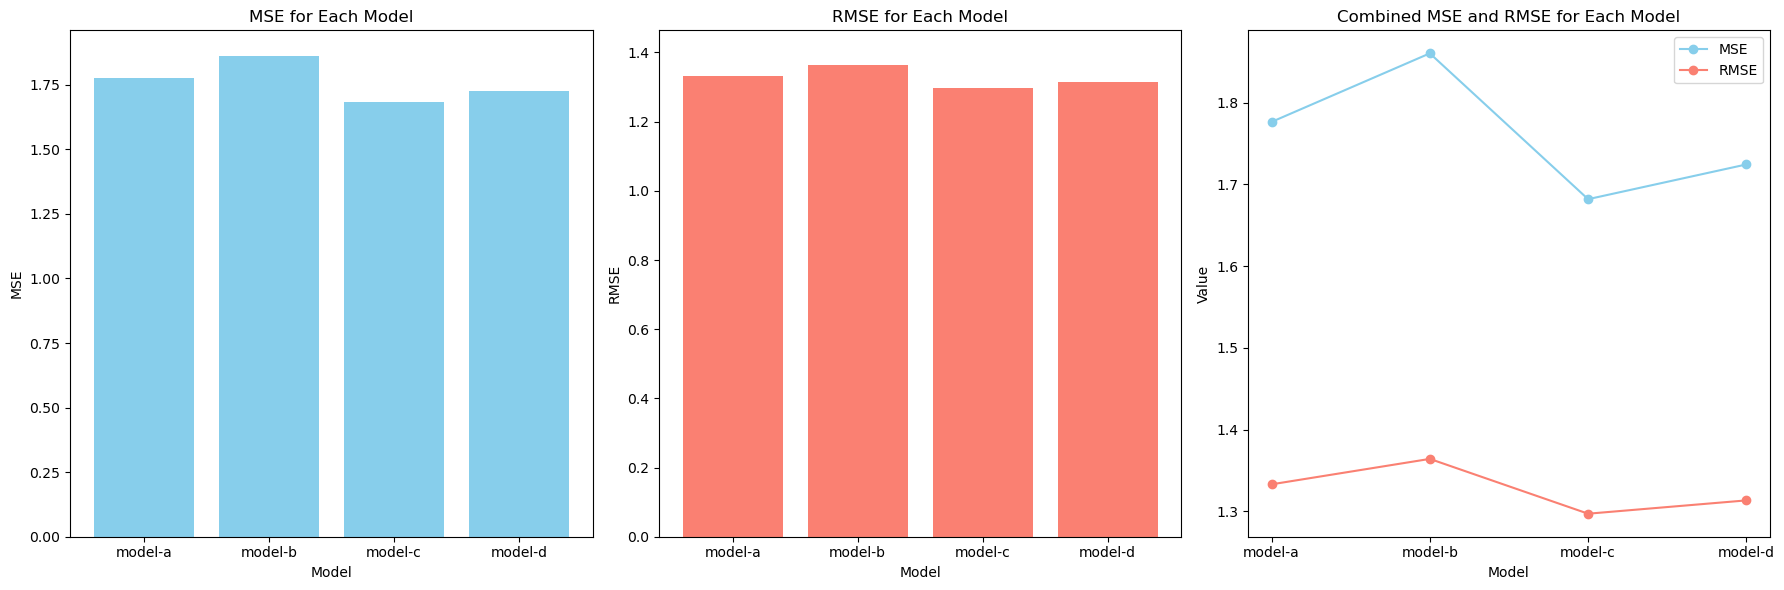

In [38]:
import matplotlib.pyplot as plt

# Preparing data for plotting
models = list(results.keys())
mse_values = [results[model][0] for model in models]  # Extract MSE
rmse_values = [results[model][1] for model in models]  # Extract RMSE


# Starting the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# MSE Graph
axs[0].bar(models, mse_values, color='skyblue')
axs[0].set_title('MSE for Each Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('MSE')
axs[0].set_ylim(0, max(mse_values) + 0.1)

# RMSE Graph
axs[1].bar(models, rmse_values, color='salmon')
axs[1].set_title('RMSE for Each Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('RMSE')
axs[1].set_ylim(0, max(rmse_values) + 0.1)

# Combined MSE and RMSE Graph
colors = ['skyblue', 'salmon']
for i, metric in enumerate([mse_values, rmse_values]):
    axs[2].plot(models, metric, marker='o', linestyle='-', color=colors[i], label=['MSE', 'RMSE'][i])
axs[2].set_title('Combined MSE and RMSE for Each Model')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('Value')
axs[2].legend()

plt.tight_layout()
plt.show()


### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The potential ethcial concerns involve misrepresentation in which the tables can create a false narrative by emphasizing different aspects of success (total medals vs. gold medals) depending on the message the presenter wishes to convey. This is akin to the issues noted in the Georgia Covid-19 data presentation, where the data was not presented chronologically, leading to a misleading portrayal of the pandemic trend. Moreover lack of transparency as it does not clarify why the two sorting methods are presented or the rationale behind the separate tables, which can lead to confusion or misinterpretation of the data—similar to the concerns over Virginia’s Covid-19 test reporting, which combined viral and serological test results without clear distinction. Last but not the least selective highlighting is done by presenting data in two separate tables could be seen as selectively highlighting certain countries to appear more successful than others. Lastly in terms of data integrity in which consistency in how data is presented such as chronological order or combining testing types is crucial for accurate interpretation, as mentioned in the ethics and ethical data visualization guide.